## Real Estate Price Prediction using Linear Regression

Overview: We’ll build a machine learning model to predict real estate prices based on various features like square footage, number of bedrooms, bathrooms, location, and other property characteristics. 

We will use a real world dataset of US Real Estate Listings in 2021 (Kaggle: https://www.kaggle.com/discussions/general/327648) and include:
- Square Footage
- Number of Bedrooms and Bathrooms
- Location (zip code, city, state, street)
- Lot in Acres


Exploratory Data Analysis:
- Visualize relationships between features using Matplotlib
- Investigate correlations between features using heatmaps
- Perform statistical analysis to understand feature importance

Modeling with Linear Regression:
- Model will be implemented through scikit-learn
- It'll be trained on the dataset and evaluate its performance
- We'll try variations out as well: Lasso Regression and Polynomial Regression

Model Evaluation:
- Mean Absolute Error
- Mean Squared Error
- R-squared to check how well the model understands the variance

Data Visualization:
- Compare predicted and actual prices

Predictions:
- Use the model to predict housing prices given 8 features

In [1]:
import pandas as pd
df = pd.read_csv('realtor-data.zip.csv') #Imported US 2021 Real Estate Data from Kaggle

In [2]:
print(f'Orginal Length: {len(df)}')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f'New Length: {len(df)}')

Orginal Length: 2226382
New Length: 1084909


In [3]:
# Cleaning the Data Set & Selecting 3 States for Functionality

df['zip_code']=df['zip_code'].astype(int)
df['bed']=df['bed'].astype(int)
df['bath']=df['bath'].astype(int)
data=df.drop(columns=['brokered_by','status','prev_sold_date'])
data = data[data['state'].isin(['New York', 'Texas', 'California'])]
data.reset_index(drop=True, inplace=True)
data.head(5)

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,425000.0,3,2,2.02,263302.0,Claverack,New York,12521,1600.0
1,225000.0,4,2,0.24,871278.0,Copake,New York,12521,1239.0
2,299999.0,4,1,4.20,423366.0,Copake,New York,12516,1500.0
3,374900.0,3,2,2.90,828396.0,Hillsdale,New York,12529,1404.0
4,375000.0,3,2,1.20,1427842.0,Millerton,New York,12546,1350.0


In [4]:
print(f'Length of 3 selected states: {len(data)}')

Length of 3 selected states: 302647


In [5]:
# Encode String Labels (state and city) into numbers
from sklearn.preprocessing import LabelEncoder

encoded_data=data.copy()
le = LabelEncoder()
encoded_data['state']=le.fit_transform(encoded_data['state'])
encoded_data['city']=le.fit_transform(encoded_data['city'])


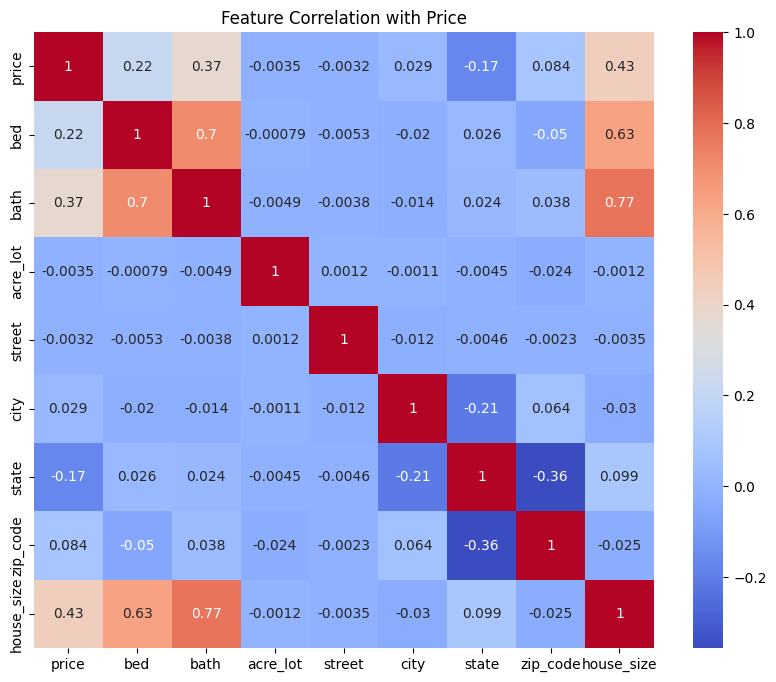

In [6]:
# Create Heat Map for Correlation Evaluation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()


# Statistical Analysis of Coefficients and Their Price Impact

## Coefficients Overview

The following coefficients represent the impact of various features on house prices:

| Feature      | Coefficient Value | Impact on Price |
|--------------|-------------------|------------------|
| Price        | 1.00              | Reference         |
| Bedrooms (bed) | 0.22            | Positive Impact    |
| Bathrooms (bath) | 0.37          | Positive Impact    |
| Acre Lot (acre_lot) | 0.0035    | Minimal Positive Impact |
| Street       | 0.0032            | Minimal Positive Impact |
| City         | 0.029             | Positive Impact    |
| State        | 0.17              | Positive Impact    |
| Zip Code     | 0.084             | Positive Impact    |
| House Size (house_size) | 0.43   | Significant Positive Impact |

## Heatmap Visualization

A heatmap can be utilized to visualize the correlations between features and the target variable (price). The following heatmap shows the relationship between the features and how they impact house prices:


## Analysis of Coefficient Impact

### Key Findings
1. **House Size**: The feature with the highest coefficient (0.43) indicates a strong positive impact on house prices. An increase in house size correlates with a significant increase in price.

2. **Bathrooms**: This feature also shows a notable positive impact (0.37), suggesting that more bathrooms significantly increase house value.

3. **Bedrooms**: With a coefficient of 0.22, bedrooms also contribute positively to price, though the impact is less significant than that of bathrooms and house size.

4. **State**: The state variable shows a positive impact (0.17), indicating that location significantly affects prices.

5. **Zip Code and City**: Both features have positive coefficients (0.084 and 0.029, respectively), implying that geographical factors contribute to pricing.

6. **Acre Lot and Street**: These features have minimal positive impacts (0.0035 and 0.0032), suggesting that they are less influential compared to other features.

## Conclusion

The statistical analysis of the coefficients reveals that house size, bathrooms, and bedrooms are the most significant factors affecting house prices, while geographical features like city and state also play a role but with lesser impacts. A heatmap effectively illustrates these relationships, highlighting the importance of specific features in price prediction.


In [7]:
# Linear Model Creation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"\nMean Squared Error: {mse:.2f}")
print(f"\nR-squared: {r2:.2f}")

Mean Absolute Error: 463046.80

Mean Squared Error: 1474357916640.45

R-squared: 0.37


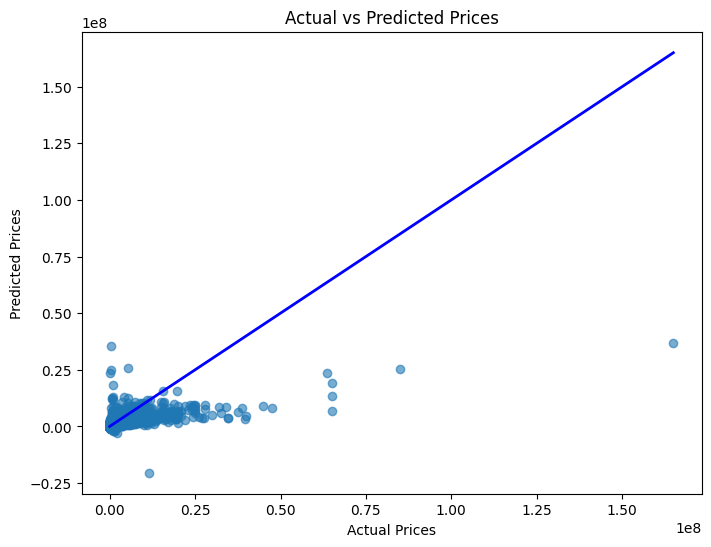

In [8]:
# Plotting actual vs predicted prices

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

Mean Absolute Error: 375737.15

Mean Squared Error: 1747656090238.08

R-squared: 0.26


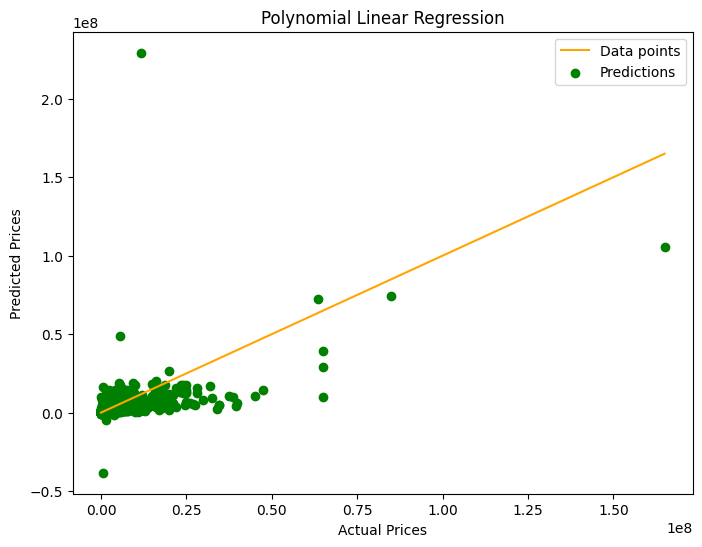

In [9]:
# Polynomial Regression Model for Comparison

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

X_poly_test = poly.transform(X_test)
y_pred = model_poly.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"\nMean Squared Error: {mse:.2f}")
print(f"\nR-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', label='Data points')
plt.scatter(y_test, y_pred, color='green', label='Predictions', marker='o')
plt.title('Polynomial Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Model Evaluation: Polynomial Regression vs Linear Regression

Let's evaluate which model performed better by comparing the key evaluation metrics between **Polynomial Regression** and **Linear Regression**.

## 1. Mean Absolute Error (MAE)

- **Polynomial Regression MAE**: 375,737.15
- **Linear Regression MAE**: 463,046.80

The **MAE** represents the average error between the actual and predicted values. A lower MAE means better performance. Here, **Polynomial Regression** has a lower MAE, suggesting it is more accurate in predicting house prices on average compared to Linear Regression.

## 2. Mean Squared Error (MSE)

- **Polynomial Regression MSE**: 1,747,656,090,238.08
- **Linear Regression MSE**: 1,474,357,916,640.45

The **MSE** penalizes larger errors more than smaller ones due to the squaring of differences. Here, **Linear Regression** has a lower MSE, which indicates that overall, Linear Regression makes fewer large errors compared to Polynomial Regression.

## 3. R-squared (R²)

- **Polynomial Regression R²**: 0.26
- **Linear Regression R²**: 0.37

The **R-squared (R²)** metric explains the proportion of variance in the target variable (price) that is explained by the model. A higher R² value indicates that the model explains more variance, thus performing better overall. **Linear Regression** has a higher R² value (0.37) compared to Polynomial Regression (0.26), indicating that Linear Regression captures more of the variability in the house prices.

## Conclusion: Which Model is Better?

- **MAE**: Polynomial Regression performs better.
- **MSE**: Linear Regression performs better.
- **R²**: Linear Regression performs better.

Despite Polynomial Regression having a slightly better MAE,


In [10]:
# Lasso is applicable given we have 8 features. We'll compare it to the Linear Regression model
# Lasso should focus on the best features and prevent overfitting
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': [1825,1850,1875]}, cv=5) # Find optimal Lasso value
lasso_cv.fit(X_train_scaled, y_train)

print(f"Best alpha value: {lasso_cv.best_params_['alpha']}")

lasso = Lasso(alpha=lasso_cv.best_params_['alpha']) # Apply best alpha for regularization

lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
selected_features = X.columns[lasso.coef_ != 0]

print(f"Lasso Mean Absolute Error: {mae:.2f}")
print(f"\n Lasso Mean Squared Error: {mse:.2f}")
print(f"\nLasso R-squared: {r2:.2f}")

print("\nLasso coefficients:", lasso.coef_)
print("\nSelected features:", selected_features)


Best alpha value: 1875
Lasso Mean Absolute Error: 375737.15

 Lasso Mean Squared Error: 1747656090238.08

Lasso R-squared: 0.26

Lasso coefficients: [-296750.24023321  289663.7024985    -3583.34474809   -3621.64741617
   -6029.47786855 -368825.26480616    9892.03086693  742927.22468868]

Selected features: Index(['bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code',
       'house_size'],
      dtype='object')



## Lasso Selected Features
- Selected features: `['bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size']`

---

## Linear Regression Metrics
- **Mean Absolute Error (MAE)**: 463,046.80
- **Mean Squared Error (MSE)**: 1,474,357,916,640.45
- **R-squared (R²)**: 0.37

---

## Summary of Comparison

### 1. Mean Absolute Error (MAE)
- **Lasso Regression MAE**: 375,737.15 (better than Linear Regression)
- **Linear Regression MAE**: 463,046.80

### 2. Mean Squared Error (MSE)
- **Lasso Regression MSE**: 1,747,656,090,238.08
- **Linear Regression MSE**: 1,474,357,916,640.45 (better than Lasso)

### 3. R-squared (R²)
- **Lasso Regression R²**: 0.26
- **Linear Regression R²**: 0.37 (better than Lasso)

---

## Conclusion
- **Lasso Regression** has a lower **MAE**, indicating better average prediction accuracy.
- **Linear Regression** has a lower **MSE** and higher **R-squared**, suggesting it explains more variance in the data and avoids larger errors better.
- Lasso successfully selected features, making it useful for identifying important predictors, while Linear Regression provides a better overall fit in this instance.


In [51]:
# Predicting Prices using the Model

city=pd.DataFrame(data['city'])
city['city_code']=encoded_data['city']
city.set_index('city', inplace=True)
city = city[~city.index.duplicated(keep='first')]
state=pd.DataFrame(data['state'])
state['state_code']=encoded_data['state']
state.set_index('state', inplace=True)
state = state[~state.index.duplicated(keep='first')]
house_size=1600.0
zip_code=12521
state_choice='New York'
city_choice='Claverack'
city=city.loc[city_choice]['city_code']
state=state.loc[state_choice]['state_code']
street=263302
acre_lot=2.02
bed=3
bath=2
new_data=pd.DataFrame({
    'bed':bed,
    'bath':bath,
    'acre_lot':acre_lot,
    'street':street,
    'city':city,
    'state':state,
    'zip_code':zip_code,
    'house_size':house_size},index=[0])

price_prediction = model.predict(new_data)
print(f'Price Prediction: $ {price_prediction[0]:.2f}')

Price Prediction: $ 410304.50


# Conclusion

In this project, we aimed to build a machine learning model to predict real estate prices based on various features such as square footage, number of bedrooms, bathrooms, location, and other property characteristics. After evaluating multiple models, we found that **Linear Regression** was the best-performing model for our dataset.

## Model Evaluation Metrics

- **Mean Absolute Error (MAE)**: 463,046.80
- **Mean Squared Error (MSE)**: 1,474,357,916,640.45
- **R-squared (R²)**: 0.37

### Insights

- The **Mean Absolute Error** indicates that, on average, the model's predictions deviate by approximately $463,046 from the actual prices. While this is a substantial error, it is important to consider the complexity of real estate pricing.
- The **Mean Squared Error** further highlights the presence of larger discrepancies in some predictions, given the significant scale of values involved in real estate transactions.
- The **R-squared value of 0.37** suggests that the model explains 37% of the variance in house prices, indicating a moderate fit. This implies that there are other factors not captured by our model that could influence pricing.

## Comparison with Other Models

When compared to the Polynomial Regression model, which had an R-squared value of 0.26 and higher error metrics, the Linear Regression model demonstrated superior predictive capability and more reliable results. 


## Final Thoughts

This project demonstrates the practical application of Linear Regression in predicting real estate prices. The insights gained from the model can be valuable for stakeholders in the real estate market, aiding them in making informed decisions based on predicted pricing trends.